In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd 
# Carregar o conjunto de dados Iris
iris = datasets.load_iris()
# Continue a partir daqui

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

In [3]:
# Dados normalizados
scaler = StandardScaler()
# Ajustar o scaler aos dados de treinamento e transformar os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)
# Transformar os dados de teste usando o scaler ajustado aos dados de treinamento
X_test_scaled = scaler.transform(X_test)

In [4]:
#Modelo Normalizado
modelo = LogisticRegression()
# Treinar o modelo com os dados de treinamento Normalizado
modelo.fit(X_train_scaled, y_train)

#Modelo Sem Normalizar

modelo_sem_normalizar = LogisticRegression()
# Treinar o modelo com os dados de treinamento Sem normalizar
modelo_sem_normalizar.fit(X_train,y_train)

LogisticRegression()

In [5]:
# Fazer previsões no conjunto de dados de teste Normalizados
previsoes = modelo.predict(X_test_scaled)
acuracia = accuracy_score(y_test, previsoes)
# Imprimir a acurácia
print(f'Acurácia do modelo: {acuracia:.2f}')

# Fazer previsões no conjunto de dados de teste Sem Normalizados
previsoes_sem_normalizar = modelo.predict(X_test)
acuracia_sem_normalizar= accuracy_score(y_test, previsoes_sem_normalizar)
# Imprimir a acurácia
print(f'Acurácia do modelo: {acuracia_sem_normalizar:.2f}')

Acurácia do modelo: 0.98
Acurácia do modelo: 0.30


In [6]:
print(previsoes_sem_normalizar)
print(y_test)
print(X_test)

[2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 1 1 2 1 1 2 2
 1 1 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 1 1 2 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1]
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5

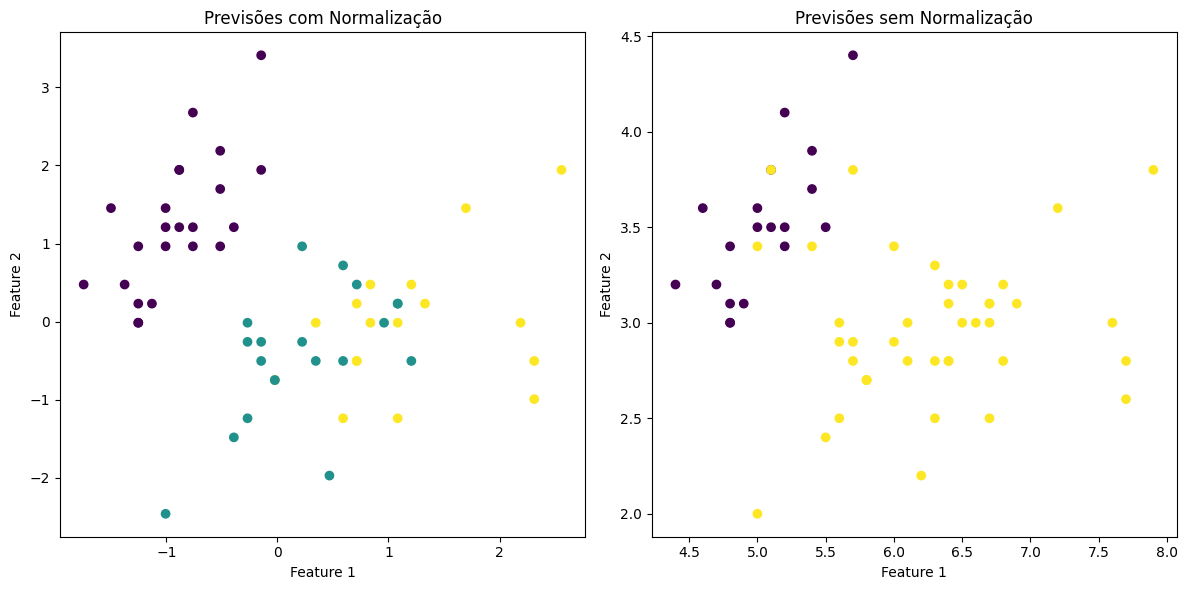

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=previsoes, cmap='viridis')
plt.title('Previsões com Normalização')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plotar previsões sem normalizar
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=previsoes_sem_normalizar, cmap='viridis')
plt.title('Previsões sem Normalização')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()